<a href="https://colab.research.google.com/github/mwithgod3952/Machine_Learning_Theory_jh/blob/master/Kalman_Filter_for_Time_Series_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!python3 --version

Python 3.6.5 :: Anaconda, Inc.


In [1]:
%%bash

MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2021-06-22 09:16:13--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2021-06-22 09:16:13--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 7.59M 7s
    50K .......... .......... .......... .......... ..........  0%

In [3]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [4]:
! easy_install numpy scipy Sphinx numpydoc nose pykalman

Searching for numpy
Reading https://pypi.org/simple/numpy/
Best match: numpy 1.21.0rc2
Processing numpy-1.21.0rc2.zip
Writing /tmp/easy_install-b27u8q5w/numpy-1.21.0rc2/setup.cfg
Running numpy-1.21.0rc2/setup.py -q bdist_egg --dist-dir /tmp/easy_install-b27u8q5w/numpy-1.21.0rc2/egg-dist-tmp-d4447ln4
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/site-packages/setuptools/sandbox.py", line 154, in save_modules
    yield saved
  File "/usr/local/lib/python3.6/site-packages/setuptools/sandbox.py", line 195, in setup_context
    yield
  File "/usr/local/lib/python3.6/site-packages/setuptools/sandbox.py", line 250, in run_setup
    _execfile(setup_script, ns)
  File "/usr/local/lib/python3.6/site-packages/setuptools/sandbox.py", line 45, in _execfile
    exec(code, globals, locals)
  File "/tmp/easy_install-b27u8q5w/numpy-1.21.0rc2/setup.py", line 34, in <module>
RuntimeError: Python version >= 3.7 required.

During handling of the above exception, another exception occu

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter as KF

ModuleNotFoundError: ignored

In [ ]:
!git clone "https://github.com/herzog-ch/stock-prediction-using-kalman-in-python.git"

fatal: destination path 'stock-prediction-using-kalman-in-python' already exists and is not an empty directory.


In [ ]:
url = "https://raw.githubusercontent.com/herzog-ch/stock-prediction-using-kalman-in-python/master/data/IFNNY.csv"
df = pd.read_csv(url, index_col=0)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,10.620000,10.740000,10.610000,10.710000,9.922544,12300
2014-09-30,10.260000,10.320000,10.210000,10.300000,9.542690,20300
2014-10-01,10.070000,10.070000,10.000000,10.050000,9.311070,24400
2014-10-02,10.020000,10.020000,9.850000,9.920000,9.190628,29100
2014-10-03,9.920000,9.950000,9.870000,9.940000,9.209157,24400
...,...,...,...,...,...,...
2019-09-23,18.620001,18.780001,18.559999,18.700001,18.700001,241600
2019-09-24,18.760000,18.790001,18.459999,18.520000,18.520000,227200
2019-09-25,18.250000,18.440001,18.110001,18.410000,18.410000,245200


In [ ]:
df.shape

(1259, 6)

In [ ]:
df.index = (pd.to_datetime(df.index))
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

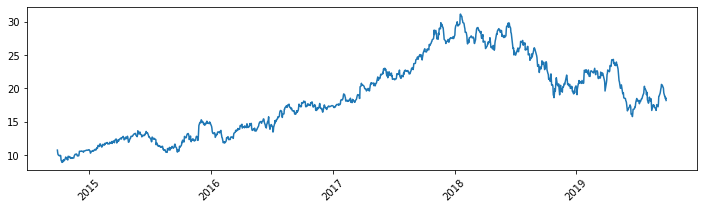

In [ ]:
plt.figure(figsize=(12, 3))

plt.plot(df.iloc[:,1])
plt.xticks(rotation=45)
plt.show()

In [ ]:
State = namedtuple('State', 'X, P')
Te_path = State("a", "b")

print(Te_path)
print(Te_path[0])
print(Te_path[1])

State(X='a', P='b')
a
b


In [ ]:
import numpy as np
from collections import namedtuple

State = namedtuple('State', 'X, P')


def predict(state, F, Q):
    """Perform the predict step
    x_pred = Fx
    P_pred = F P F^T + Q
    :param state: State namedtuple
    :param F: Transition matrix
    :param Q: Process Covariance
    :return: The prior as a State namedtuple
    """

    assert state.X.shape[0] == F.shape[1]
    assert state.X.shape[1] == 1
    assert F.shape[0] == F.shape[1]
    assert Q.shape[0] == Q.shape[1]
    assert Q.shape[0] == F.shape[0]

    x_pred = np.matmul(F, state.X)
    p_pred = np.matmul(F, np.matmul(state.P, F.T)) + Q
    return State(x_pred, p_pred)


def update(prior, z, R, H):
    """Perform update step
    S = H P_prior H^T + R
    K = P_prior H^T S^-1
    y = z - H x_prior
    x = x_prior + Ky
    P = (I - KH) P_prior
    :param prior: State namedtuple holding the prior mean and covariance
    :param z: measurement vector
    :param R: measurement covariance matrix
    :param H: measurement matrix
    :return: Returns the posterior mean and covariance as State namedtuple
    """

    assert prior.X.shape[1] == 1
    assert prior.X.shape[0] == H.shape[1]
    assert H.shape[0] == z.shape[0]
    assert z.shape[1] == 1
    assert prior.P.shape[0] == prior.P.shape[1]
    assert prior.P.shape[1] == H.shape[1]

    z_pred = np.matmul(H, prior.X)
    y = z - z_pred
    S = np.matmul(H, np.matmul(prior.P, H.T)) + R
    K = np.matmul(prior.P, np.matmul(H.T, np.linalg.inv(S)))
    x_posterior = prior.X + np.matmul(K, y)
    p_posterior = np.matmul((np.identity(prior.P.shape[0]) - np.matmul(K, H)), prior.P)
    return State(x_posterior, p_posterior)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def main():

    # read data
    # data_filename = '../data/IFNNY.csv'
    # dataReader = yahoo_financedata.YahooFinanceData()
    # dataReader.open_data(data_filename)

    x = np.full((2, 1), 2)
    P = np.full((2, 2), 2 ** 2)
    state = State(x, P)

    Q = np.full((2, 2), 1 ** 2)
    F = np.array([[1, 1],
                  [0, 1]])
    R = np.array([[0.5 ** 2]])
    H = np.array([[1, 0]])

    gt = {'price': [], 'trend': []}
    result = {'price': [], 'trend': []}
    velocity = []

    counter = 0

    if counter == 0:
        x = np.array([[z[0][0]], [0]])                                  # update sections's second input
        state = State(x, P)

    prior = predict(state, F, Q)
    posterior = update(prior, z, R, H)
    state = posterior

    gt['price'].append(z[0][0])
    result['price'].append(prior.X[0][0])
    velocity.append(prior.X[1][0])
    
    if counter == 0:
        gt['trend'].append(1)
        result['trend'].append(1)
    else:
        predicted_trend = 1 if prior.X[0][0] > result['price'][counter - 1] else -1
        result['trend'].append(predicted_trend)
        gt_trend = 1 if z[0][0] > gt['price'][counter - 1] else -1
        gt['trend'].append(gt_trend)

    counter += 1
        # if counter > 20:
        #    break

    # KPI
    # number of correct trend predictions
    correct_predictions = 0
    for x, y in zip(result['trend'], gt['trend']):
        if x == y:
            correct_predictions += 1
    print(correct_predictions)
    print(len(gt['trend']))
    print(float(correct_predictions) / len(gt['trend']))

    plt.figure(1)

    plt.plot(gt['price'])
    plt.plot(result['price'])
    plt.plot(velocity)

    x_axis = list(range(len(gt['trend'])))
    plt.scatter(x_axis, gt['trend'], marker='o', color='g')
    plt.scatter(x_axis, result['trend'], marker='x', color='r')

    plt.legend(['actual stock price', 'predicted stock price', 'actual trend', 'predicted trend', 'momentum'])

    plt.grid()
    plt.show()


if __name__ == '__main__':
    main()

NameError: ignored